In [34]:
import torch
from pathlib import Path
import requests

DATA_PATH = Path("data/")

IMAGE_PATH = DATA_PATH / "pizza-steak-sushi"

if IMAGE_PATH.is_dir():
  pass
else:
  print(f"Creating the {IMAGE_PATH} directory...")
  IMAGE_PATH.mkdir(exist_ok=True, parents=True)

with open(DATA_PATH / "pizza-steak-sushi.zip", 'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

In [35]:
import zipfile

with zipfile.ZipFile(DATA_PATH / "pizza-steak-sushi.zip", 'r') as zip_ref:
  print("Unzipping the pizza, sushi and steak...")
  zip_ref.extractall(IMAGE_PATH)

Unzipping the pizza, sushi and steak...


In [36]:
import os
def walk_dir(dir_path):
  """young jesus"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [37]:
walk_dir(IMAGE_PATH)

There are 2 directories and 0 images in 'data/pizza-steak-sushi'
There are 3 directories and 0 images in 'data/pizza-steak-sushi/train'
There are 0 directories and 72 images in 'data/pizza-steak-sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza-steak-sushi/train/steak'
There are 0 directories and 78 images in 'data/pizza-steak-sushi/train/pizza'
There are 3 directories and 0 images in 'data/pizza-steak-sushi/test'
There are 0 directories and 31 images in 'data/pizza-steak-sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza-steak-sushi/test/steak'
There are 0 directories and 25 images in 'data/pizza-steak-sushi/test/pizza'


In [38]:
train_dir = IMAGE_PATH / "train"
test_dir = IMAGE_PATH / "test"

Image name is pizza
Image height is 288
Image width is 512


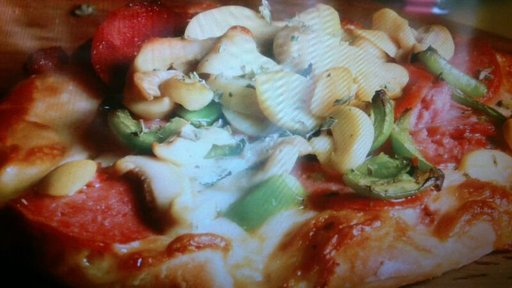

In [6]:
import random
from PIL import Image
image_path_list = list(IMAGE_PATH.glob('*/*/*.jpg'))
random_image_path = random.choice(image_path_list)
random_image_path

img = Image.open(random_image_path)
img_class = random_image_path.parent.stem
print(f'Image name is {img_class}')
print(f'Image height is {img.height}')
print(f'Image width is {img.width}')
img

<Figure size 1400x900 with 0 Axes>

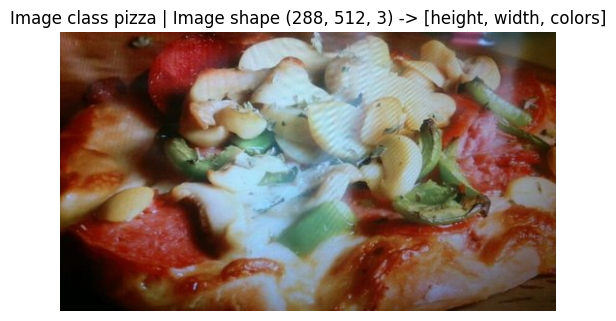

<Figure size 1400x900 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)
plt.imshow(img_as_array)
plt.title(f"Image class {img_class} | Image shape {img_as_array.shape} -> [height, width, colors]")
plt.axis(False)
plt.figure(figsize=(14,9))

array([[[121,  63,  39],
        [127,  70,  43],
        [130,  73,  46],
        ...,
        [ 38,  34,   5],
        [ 37,  33,   4],
        [ 37,  33,   4]],

       [[121,  63,  39],
        [125,  67,  43],
        [128,  71,  44],
        ...,
        [ 39,  35,   6],
        [ 39,  35,   6],
        [ 39,  35,   6]],

       [[123,  65,  43],
        [126,  68,  44],
        [128,  70,  46],
        ...,
        [ 42,  37,   7],
        [ 42,  37,   7],
        [ 42,  37,   7]],

       ...,

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [ 49,  31,   9],
        [ 49,  31,   9],
        [ 49,  31,   9]],

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [ 50,  32,  10],
        [ 52,  34,  12],
        [ 54,  36,  14]],

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [ 52,  34,  12],
        [ 55,  37,  15],
        [ 58,  40,  18]]], dtype=uint8)
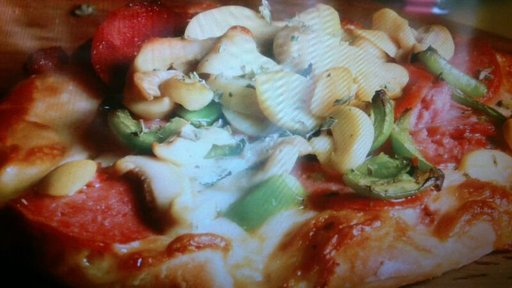

In [8]:
img_as_array

In [39]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

data_transform(img)

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

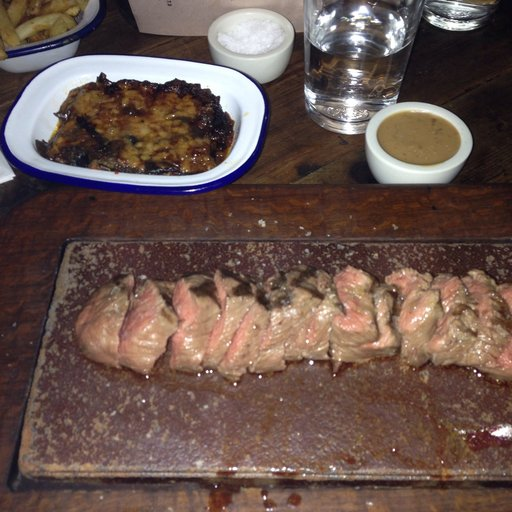

In [10]:
Image.open(image_path_list[78])

In [ ]:
def plot_transform_images(
    image_path_list: list,
    transform,
    n=3,
    seed=None
):
  if seed:
    torch.manual_seed(seed)
  rand_img_path_list = random.sample(image_path_list, k=n)
  for rand_img in rand_img_path_list:
    with Image.open(rand_img) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original Image\nSize: {f.size}")
      ax[0].axis(False)

      transformed_img = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed Image\nShape: {transformed_img.shape}")
      ax[1].axis("off")

      class_name = rand_img.parent.stem
      fig.suptitle(f"Class: {class_name}", fontsize=16)


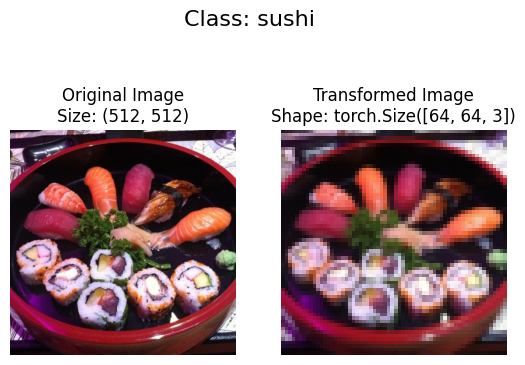

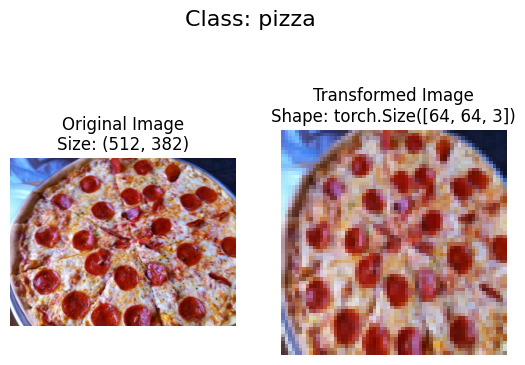

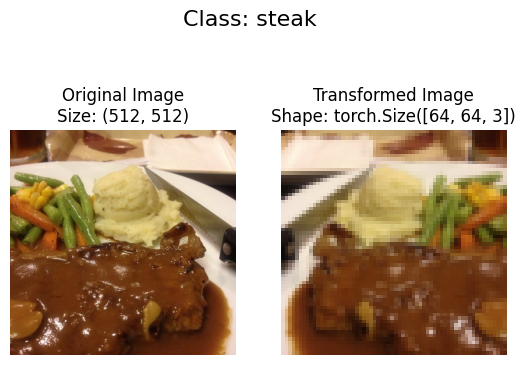

In [12]:
plot_transform_images(image_path_list, data_transform, seed=42)

In [ ]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [ ]:
len(train_data), len(test_data)

In [ ]:
img, label = train_data[0][0], train_data[0][1]

print(f"Train data shape -> {img.size}")
print(f"Image shape -> {img.shape}")
print(f"Image dtype -> {img.dtype}")
print(f"Label type -> {type(label)}")
print(f"Image tensor -> {img}")

In [ ]:
class_dict = train_data.class_to_idx

In [ ]:
class_names = train_data.classes


In [ ]:
img_permuted = img.permute(1,2,0)

(-0.5, 63.5, 63.5, -0.5)

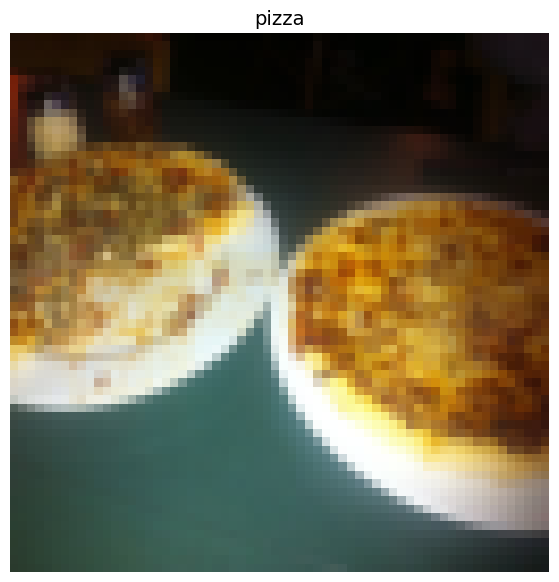

In [19]:
plt.figure(figsize=(10,7))
plt.title(class_names[label], fontsize=14)
plt.imshow(img_permuted)
plt.axis("off")

In [ ]:
class_dict

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count())

In [ ]:
len(train_dataloader), len(test_dataloader)

In [ ]:
img, label = next(iter(train_dataloader))

In [ ]:
import os
def find_classes(target_dir: str):
  classes = sorted([entry.name for entry in list(os.scandir(target_dir)) if entry.is_dir()])

  if not classes:
    raise FileNotFoundError("Classes doesn't exist!")
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [ ]:
find_classes(train_dir)

In [ ]:
from torch.utils.data import Dataset
from typing import Tuple, List

In [ ]:
class ImageFolderCustom(Dataset):
    def __init__(self, target_dir: str, transform=None):
        self.paths = list(Path(target_dir).glob("*/*.jpg"))  # expects train/pizza/image.jpg
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(target_dir)

    def load_image(self, idx: int):
        img_path = self.paths[idx]
        return Image.open(img_path)

    def __len__(self) -> int:
        return len(self.paths)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, int]:  # Update the return type
        self.img = self.load_image(idx)
        self.class_name = self.paths[idx].parent.name
        self.class_idx = self.class_to_idx[self.class_name]

        if self.transform:
            self.img = self.transform(self.img)

        return self.img, self.class_idx # Return class name along with image and index


In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

In [ ]:
train_data_custom = ImageFolderCustom(target_dir = train_dir,
                                      transform = train_transforms)

test_data_custom = ImageFolderCustom(target_dir = test_dir,
                                      transform = train_transforms)

In [ ]:
train_data_custom.classes

torch.Size([3, 64, 64])


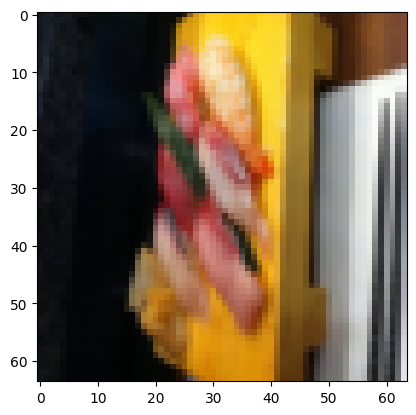

In [31]:
img, class_idx= train_data_custom.__getitem__(2)

print(img.shape)  # This will print the class name.
img = img.permute(2,1,0)
plt.imshow(img)

In [ ]:
for data in train_data_custom:
  print(data)
  break

In [40]:
from typing import Tuple

In [41]:
class_names

['pizza', 'steak', 'sushi']

In [42]:
def display_rand_img(dataset: torch.utils.data.Dataset,
                  class_names: List,
                  n: int = 10,
                  display_shape: bool = None,
                  seed: int = None):
  if seed:
    torch.manual_seed(42)
  if n > 10:
    n = 10
    print(f"Due to the n > 10, shape won't appear!")
    display_shape = False
  plt.figure(figsize=(14,6))
  target_samples_idx = random.sample(range(len(dataset)), k=n)
  for i, target_sample in enumerate(target_samples_idx):
    target_img, target_label = train_data[target_sample]
    targ_img_adjust = target_img.permute(1,2,0)
    plt.subplot(1, n, i+1)
    plt.imshow(targ_img_adjust)
    if class_names:
      title = f"Class: {class_names[target_label]}"
      if display_shape:
        title += f"\nShape: {targ_img_adjust.shape}"
    plt.title(title)
    plt.axis("off")

Due to the n > 10, shape won't appear!


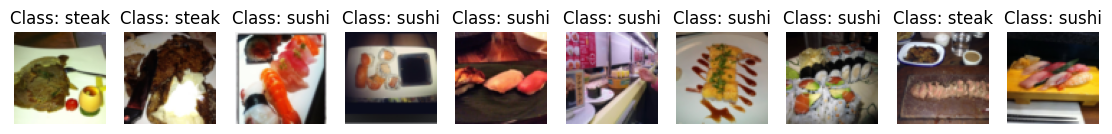

In [43]:
display_rand_img(train_data,
                 class_names=class_names,
                 n=1000000,
                 display_shape=True,
                 seed=42)

In [49]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32
train_dataloader_custom = DataLoader(train_data,
                                     batch_size=BATCH_SIZE,
                                     shuffle = True,
                                     num_workers=os.cpu_count())

test_dataloader_custom = DataLoader(test_data,
                                     batch_size=BATCH_SIZE,
                                     shuffle = True,
                                     num_workers=os.cpu_count())

In [50]:
train_dataloader_custom

In [53]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape

torch.Size([32, 3, 64, 64])